In [1]:
!pip install seaborn

In [2]:
import numpy as np
from scipy.stats import chi2_contingency
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/home/ikuseta/diplomski_projekt/autonomousGIS/LUCAS-SOIL-2018.csv')
df

,Depth,POINTID,pH_CaCl₂,pH_H₂O,EC,OC,CaCO₃,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC₀_Desc,LC₁_Desc,LU₁_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3,< LOD,1.1,101.9,...,AT113,47.150238,16.134212,06-07-18,291,C23,U120,Woodland,Other coniferous woodland,Forestry
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1,< LOD,1.3,51.2,...,AT113,47.274272,16.175359,06-07-18,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1,12.3,3.1,114.8,...,AT113,47.123260,16.289693,02-06-18,246,C33,U120,Woodland,Other mixed woodland,Forestry
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3,< LOD,2,165.8,...,AT113,47.245693,16.357506,06-07-18,305,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2,< LOD,2.2,42.1,...,AT113,47.296372,16.416782,05-07-18,335,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18978,0-20 cm,32643634,6.0,6.13,91.40,51.4,2,92.2,5.3,1036.9,...,UKN11,54.713343,-6.563749,24-07-18,50,E20,U111,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...
18979,0-20 cm,32703676,4.9,5.14,51.78,73.9,NaN,81.6,6.9,225,...,UKN12,55.091488,-6.625119,02-08-18,34,B55,U111,Cropland,Temporary grassland,Agriculture (excluding fallow land and kitchen...
18980,0-20 cm,32783608,5.5,5.94,22.40,63.7,1,101.9,6.7,569.5,...,UKN14,54.515104,-6.259448,18-06-18,50,E20,U111,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...
18981,0-20 cm,32783636,5.3,5.90,10.42,38.3,1,7.3,3.1,1907.9,...,UKN13,54.759266,-6.358608,05-06-18,122,E20,U370,Grassland,Grassland without tree/shrub cover,Residential


In [4]:
df.isna().sum() # to check null values

Depth                   0
POINTID                 0
pH_CaCl₂                1
pH_H₂O                  1
EC                      9
OC                      1
CaCO₃                7763
P                      26
N                       1
K                       1
OC (20–30 cm)       18842
CaCO₃ (20–30 cm)    18969
Ox_Al               16473
Ox_Fe               16473
NUTS_0                  0
NUTS_1                  0
NUTS_2                  0
NUTS_3                  0
TH_LAT                  0
TH_LONG                 0
SURVEY_DATE             0
Elev                    0
LC                      0
LU                      0
LC₀_Desc                0
LC₁_Desc                0
LU₁_Desc                0
dtype: int64

In [5]:
# Create a subset of columns with ~123-124 missing values
cols_to_check = ['POINTID', 'pH_CaCl₂', 'pH_H₂O', 'OC', 'N', 'K', 
                 'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3', 
                 'TH_LAT', 'TH_LONG', 'SURVEY_DATE', 'Elev', 'LC', 'LU',
                 'LC₀_Desc', 'LC₁_Desc', 'LU₁_Desc']

# Count how many rows have all these columns missing
rows_all_missing = df[cols_to_check].isna().all(axis=1).sum()
print(f"Number of rows where all selected columns are missing: {rows_all_missing}")

# Count how many rows have at least one of these columns missing
rows_any_missing = df[cols_to_check].isna().any(axis=1).sum()
print(f"Number of rows where at least one of selected columns is missing: {rows_any_missing}")

Number of rows where all selected columns are missing: 0
Number of rows where at least one of selected columns is missing: 1


In [6]:
# Create boolean masks for both conditions
all_missing_mask = df[cols_to_check].isna().all(axis=1)
any_missing_mask = df[cols_to_check].isna().any(axis=1)

# Find rows that have some but not all missing values
partial_missing_mask = any_missing_mask & ~all_missing_mask

# View these rows
partial_missing_rows = df[partial_missing_mask]

# Display the result
print("Rows with some (but not all) missing values in specified columns:")


# To see which values are missing in this row
print("\nMissing values in these rows:")
print(partial_missing_rows[cols_to_check].isna())

partial_missing_rows

Rows with some (but not all) missing values in specified columns:

Missing values in these rows:
       POINTID  pH_CaCl₂  pH_H₂O    OC     N     K  NUTS_0  NUTS_1  NUTS_2  \
15502    False      True    True  True  True  True   False   False   False   

       NUTS_3  TH_LAT  TH_LONG  SURVEY_DATE   Elev     LC     LU  LC₀_Desc  \
15502   False   False    False        False  False  False  False     False   

       LC₁_Desc  LU₁_Desc  
15502     False     False  


,Depth,POINTID,pH_CaCl₂,pH_H₂O,EC,OC,CaCO₃,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC₀_Desc,LC₁_Desc,LU₁_Desc
15502,20-30 cm,27021938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PT170,38.727108,-8.708952,09-07-18,106,C10,U120,Woodland,Broadleaved woodland,Forestry


In [7]:
df.loc[df['Depth'] == '20-30 cm']

,Depth,POINTID,pH_CaCl₂,pH_H₂O,EC,OC,CaCO₃,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC₀_Desc,LC₁_Desc,LU₁_Desc
15502,20-30 cm,27021938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PT170,38.727108,-8.708952,09-07-18,106,C10,U120,Woodland,Broadleaved woodland,Forestry


In [8]:
# Create a boolean mask for rows where all specified columns are missing
mask = df[cols_to_check].isna().all(axis=1)

# Get the rows where all specified columns are missing
missing_rows = df[mask]
# Set pandas to show all columns and rows

# Display the missing rows
missing_rows

,Depth,POINTID,pH_CaCl₂,pH_H₂O,EC,OC,CaCO₃,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC₀_Desc,LC₁_Desc,LU₁_Desc


In [9]:
# Get unique combinations of the last three columns
df_new = df.copy()

unique_combinations = df_new[['LC₀_Desc', 'LC₁_Desc', 'LU₁_Desc']].drop_duplicates()

# Display all unique combinations
print("Unique combinations of LC₀_Desc, LC₁_Desc, and LU₁_Desc:")
unique_combinations


Unique combinations of LC₀_Desc, LC₁_Desc, and LU₁_Desc:


,LC₀_Desc,LC₁_Desc,LU₁_Desc
0,Woodland,Other coniferous woodland,Forestry
1,Woodland,Spruce dominated coniferous woodland,Forestry
2,Woodland,Other mixed woodland,Forestry
3,Woodland,Pine dominated coniferous woodland,Forestry
5,Cropland,Triticale,Agriculture (excluding fallow land and kitchen...
...,...,...,...
18361,Artificial land,Non built-up linear features,Forestry
18405,Woodland,Spruce dominated coniferous woodland,Other abandoned areas
18631,Artificial land,Non built-up linear features,Agriculture (excluding fallow land and kitchen...
18667,Woodland,Broadleaved woodland,Sport


In [10]:
# If you want to also see how many times each combination appears
combination_counts = df_new.groupby(['LC₀_Desc', 'LC₁_Desc', 'LU₁_Desc']).size().reset_index(name='count')
combination_counts = combination_counts.sort_values('count', ascending=False)

print("\nCombination counts:")
combination_counts



Combination counts:


,LC₀_Desc,LC₁_Desc,LU₁_Desc,count
103,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...,2612
166,Woodland,Broadleaved woodland,Forestry,1603
36,Cropland,Common wheat,Agriculture (excluding fallow land and kitchen...,1556
186,Woodland,Pine dominated coniferous woodland,Forestry,1162
31,Cropland,Barley,Agriculture (excluding fallow land and kitchen...,977
...,...,...,...,...
192,Woodland,Pine dominated mixed woodland,Commerce,1
196,Woodland,Pine dominated mixed woodland,Sport,1
194,Woodland,Pine dominated mixed woodland,Other abandoned areas,1
199,Woodland,Spruce dominated coniferous woodland,Other abandoned areas,1


In [11]:
# For all columns
for column in unique_combinations.columns:
    print(f"Total number of unique values for {column}: {unique_combinations[column].nunique()}")

Total number of unique values for LC₀_Desc: 8
Total number of unique values for LC₁_Desc: 65
Total number of unique values for LU₁_Desc: 26


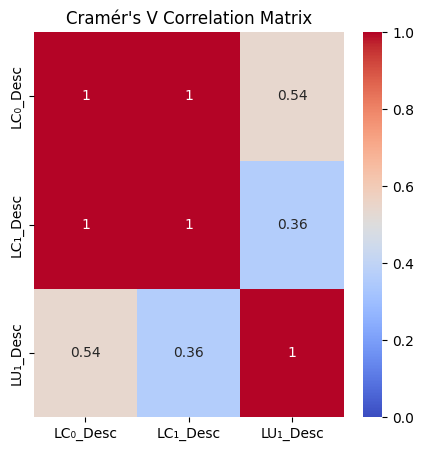

In [12]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Create empty correlation matrix
cols = ['LC₀_Desc', 'LC₁_Desc', 'LU₁_Desc']
n = len(cols)
cramer_matrix = np.zeros((n, n))

# Fill the matrix
for i in range(n):
    for j in range(n):
        cramer_matrix[i, j] = cramers_v(df[cols[i]], df[cols[j]])

# Convert to DataFrame for better visualization
cramer_df = pd.DataFrame(cramer_matrix, index=cols, columns=cols)

# Visualize
plt.figure(figsize=(5, 5))
sns.heatmap(cramer_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Matrix")
plt.show()


In [13]:
combination_counts_LCs = df_new.groupby(['LC₀_Desc', 'LC₁_Desc']).size().reset_index(name='count')
combination_counts_LCs = combination_counts_LCs.sort_values('count', ascending=False)

print("\nCombination counts:")
combination_counts_LCs


Combination counts:


,LC₀_Desc,LC₁_Desc,count
49,Grassland,Grassland without tree/shrub cover,2833
58,Woodland,Broadleaved woodland,2051
12,Cropland,Common wheat,1556
61,Woodland,Pine dominated coniferous woodland,1264
9,Cropland,Barley,977
...,...,...,...
3,Bareland,Lichens and Moss,3
5,Bareland,Rocks and stones,2
44,Cropland,Tobacco,2
54,Water,Inland salty water bodies,1


In [14]:
df.dtypes

Depth                object
POINTID               int64
pH_CaCl₂            float64
pH_H₂O              float64
EC                  float64
OC                   object
CaCO₃                object
P                    object
N                    object
K                    object
OC (20–30 cm)        object
CaCO₃ (20–30 cm)    float64
Ox_Al               float64
Ox_Fe               float64
NUTS_0               object
NUTS_1               object
NUTS_2               object
NUTS_3               object
TH_LAT              float64
TH_LONG             float64
SURVEY_DATE          object
Elev                  int64
LC                   object
LU                   object
LC₀_Desc             object
LC₁_Desc             object
LU₁_Desc             object
dtype: object

In [15]:
df.isna().sum() # to check null values

Depth                   0
POINTID                 0
pH_CaCl₂                1
pH_H₂O                  1
EC                      9
OC                      1
CaCO₃                7763
P                      26
N                       1
K                       1
OC (20–30 cm)       18842
CaCO₃ (20–30 cm)    18969
Ox_Al               16473
Ox_Fe               16473
NUTS_0                  0
NUTS_1                  0
NUTS_2                  0
NUTS_3                  0
TH_LAT                  0
TH_LONG                 0
SURVEY_DATE             0
Elev                    0
LC                      0
LU                      0
LC₀_Desc                0
LC₁_Desc                0
LU₁_Desc                0
dtype: int64

In [16]:
df.select_dtypes(include=['object']).columns

Index(['Depth', 'OC', 'CaCO₃', 'P', 'N', 'K', 'OC (20–30 cm)', 'NUTS_0',
       'NUTS_1', 'NUTS_2', 'NUTS_3', 'SURVEY_DATE', 'LC', 'LU', 'LC₀_Desc',
       'LC₁_Desc', 'LU₁_Desc'],
      dtype='object')

In [17]:
def analyze_and_transform_column(df, column_name):
    # Make a copy of the column for analysis
    column = df[column_name]
    
    # First check if the column has any numeric values
    numeric_mask = pd.to_numeric(column.replace('< LOD', '0'), errors='coerce').notna()
    numeric_count = numeric_mask.sum()
    
    if numeric_count > 0:  # If column has any numeric values
        # Replace '< LOD' with '0' and convert to numeric
        df[column_name] = df[column_name].replace('< LOD', '0')
        
        try:
            df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
            print(f"\nColumn: {column_name}")
            print(f"Successfully converted to numeric")
            print(f"Number of NaN after conversion: {df[column_name].isna().sum()}")
            print(f"Current dtype: {df[column_name].dtype}")
        except Exception as e:
            print(f"\nColumn: {column_name}")
            print(f"Error in conversion: {str(e)}")
            
        # Identify any remaining non-numeric values that were converted to NaN
        if df[column_name].isna().any():
            original_non_numeric = column[df[column_name].isna()].unique()
            print("Values that couldn't be converted to numeric:", original_non_numeric)
    
    return df

# Apply transformation to all object columns
for column in df.select_dtypes(include=['object']).columns:
    df = analyze_and_transform_column(df, column)

# Verify the changes
print("\nFinal datatypes of all columns:")
print(df.dtypes)



Column: OC
Successfully converted to numeric
Number of NaN after conversion: 3
Current dtype: float64
Values that couldn't be converted to numeric: ['<0.0' nan]

Column: CaCO₃
Successfully converted to numeric
Number of NaN after conversion: 7772
Current dtype: float64
Values that couldn't be converted to numeric: [nan '<  LOD']

Column: P
Successfully converted to numeric
Number of NaN after conversion: 27
Current dtype: float64
Values that couldn't be converted to numeric: [nan '<0.0']

Column: N
Successfully converted to numeric
Number of NaN after conversion: 1
Current dtype: float64
Values that couldn't be converted to numeric: [nan]

Column: K
Successfully converted to numeric
Number of NaN after conversion: 1
Current dtype: float64
Values that couldn't be converted to numeric: [nan]

Column: OC (20–30 cm)
Successfully converted to numeric
Number of NaN after conversion: 18842
Current dtype: float64
Values that couldn't be converted to numeric: [nan]

Final datatypes of all colu

In [18]:
# Method 1: Find all rows where any column contains "< LOD"
lod_mask = (df == '< LOD').any(axis=1)
rows_with_lod = df[lod_mask]

# Print the rows and highlight which columns contain "< LOD"
print("Rows containing '< LOD':")
print("------------------------")
for idx, row in rows_with_lod.iterrows():
    print(f"\nRow {idx}:")
    # Only show columns that contain "< LOD" in this row
    lod_columns = row[row == "< LOD"].index
    print("'< LOD' found in columns:", lod_columns.tolist())

Rows containing '< LOD':
------------------------


In [19]:
df[df['P'].isna()][['Depth', 'P', 'N','K']]

,Depth,P,N,K
2819,0-20 cm,NaN,1.2,215.2
2909,0-20 cm,NaN,0.7,172.7
3115,0-20 cm,NaN,0.8,184.8
3129,0-20 cm,NaN,1.0,117.1
3212,0-20 cm,NaN,0.0,56.0
3262,0-20 cm,NaN,1.6,167.2
3324,0-20 cm,NaN,0.7,278.7
3773,0-20 cm,NaN,1.0,77.6
4016,0-20 cm,NaN,0.5,106.8
4132,0-20 cm,NaN,0.6,74.2


In [20]:
df = df.fillna(0)

# To verify NaN values in all columns
print("\nNumber of NaN values remaining in each column:")
df.isna().sum()


Number of NaN values remaining in each column:


Depth               0
POINTID             0
pH_CaCl₂            0
pH_H₂O              0
EC                  0
OC                  0
CaCO₃               0
P                   0
N                   0
K                   0
OC (20–30 cm)       0
CaCO₃ (20–30 cm)    0
Ox_Al               0
Ox_Fe               0
NUTS_0              0
NUTS_1              0
NUTS_2              0
NUTS_3              0
TH_LAT              0
TH_LONG             0
SURVEY_DATE         0
Elev                0
LC                  0
LU                  0
LC₀_Desc            0
LC₁_Desc            0
LU₁_Desc            0
dtype: int64

In [22]:
df.to_csv('temp_lucas.csv', index=False)